<a href="https://colab.research.google.com/github/nicholas99212/DS1002/blob/main/Copy_of_04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

8323 

0


<ipython-input-1-062d5e8da915>:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df['Price'], hue=df['Property Type']) # Price by property type


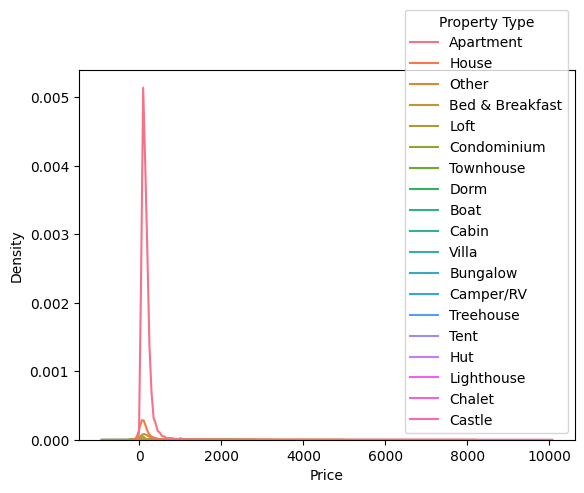

In [1]:
# Part 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

df = pd.read_csv('/content/airbnb_hw.csv')

print(df['Price'].describe(), '\n')
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
print(df['Price'].describe(), '\n') # Now a float variable


print(df['Review Scores Rating'].isna().sum(), '\n') # 8323 missing values
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean())
print(df['Review Scores Rating'].isna().sum()) # No missing values

sns.kdeplot(x=df['Price'], hue=df['Property Type']) # Price by property type
plt.show()

In [2]:
# Part 2
property_dummy = pd.get_dummies(df['Property Type'], dtype='int')
neighbourhood_dummy = pd.get_dummies(df['Neighbourhood '], dtype='int')
roomtype_dummy =  pd.get_dummies(df['Room Type'], dtype='int')


In [3]:
# Part 3
y = df['Price']
X = df.drop('Price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [4]:
# Part 4
y = df['Price']
X = property_dummy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})

y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

print('Training R^2:', reg.score(X_train,y_train))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_hat_train)))
print('Test R^2:', reg.score(X_test,y_test))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_hat_test)))
results

Training R^2: 0.005535669772592122
Training RMSE: 188.22275727388316
Test R^2: 0.006694368619513558
Test RMSE: 229.61659500278395


,variable,coefficient
0,Apartment,161.350431
1,Bed & Breakfast,108.310811
2,Boat,167.333333
3,Bungalow,151.333333
4,Cabin,165.000000
5,Camper/RV,127.400000
6,Castle,0.000000
7,Chalet,0.000000
8,Condominium,263.432099
9,Dorm,73.230769


In [5]:
y = df['Price']
X = neighbourhood_dummy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})

y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

print('Training R^2:', reg.score(X_train,y_train))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_hat_train)))
print('Test R^2:', reg.score(X_test,y_test))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_hat_test)))
results

Training R^2: 0.037963986587503884
Training RMSE: 185.12846105729506
Test R^2: 0.030673261290628195
Test RMSE: 226.82813400182758


,variable,coefficient
0,Bronx,97.200730
1,Brooklyn,130.137138
2,Manhattan,197.014004
3,Queens,101.482854
4,Staten Island,174.388889


In [6]:
y = df['Price']
X = roomtype_dummy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})

y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

print('Training R^2:', reg.score(X_train,y_train))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_hat_train)))
print('Test R^2:', reg.score(X_test,y_test))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_hat_test)))
results

Training R^2: 0.11407932001862708
Training RMSE: 177.65398172612018
Test R^2: 0.08386368486695428
Test RMSE: 220.516897159504


,variable,coefficient
0,Entire home/apt,219.498460
1,Private room,91.699087
2,Shared room,82.467066


My model that regressed a room type dummy variable on price had the greatest predictive power when compared to models using neighborhood and property type.

In [20]:
# Part 5
from sklearn.preprocessing import PolynomialFeatures

y = df['Price']
X = df[['Room Type', 'Neighbourhood ', 'Beds']]
X = pd.get_dummies(X, columns=['Room Type', 'Neighbourhood ']) # transform respective dummy variables

# There are some missing values in the data for the variable X, so some cleaning is required to apply the polynomial transformation
data = pd.concat([X, y], axis=1)
data = data.dropna()
X = data.drop(columns=['Price'])
y = data['Price'] # Drops missing values from X, removes the Y values for these rows, then separates data back into X and y variables

poly = PolynomialFeatures(degree=2)  # polynomial transformation
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=100)

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

y_hat_train = reg.predict(X_train) # Predictions
y_hat_test = reg.predict(X_test)

train_r2 = r2_score(y_train, y_hat_train) # RMSE and R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_r2 = r2_score(y_test, y_hat_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training R^2:', train_r2)
print('Training RMSE:', train_rmse)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

# Print coefficients and feature names
results = pd.DataFrame({'variable': poly.get_feature_names_out(X.columns), 'coefficient': reg.coef_})
results

Training R^2: 0.1971124108328769
Training RMSE: 177.6327288852568
Test R^2: 0.18751454594583605
Test RMSE: 173.34480082228254


,variable,coefficient
0,1,4.280470e+13
1,Beds,1.512423e+14
2,Room Type_Entire home/apt,-6.184157e+11
3,Room Type_Private room,5.075772e+13
4,Room Type_Shared room,-3.053523e+12
5,Neighbourhood _Bronx,-2.218539e+13
6,Neighbourhood _Brooklyn,3.730992e+14
7,Neighbourhood _Manhattan,7.135452e+13
8,Neighbourhood _Queens,3.436470e+13
9,Neighbourhood _Staten Island,-2.161483e+13


The new model with a polynomial transformation and an interaction term between room type and neighbourhood performs better than my previous models, with an R2 of about 19% and a RMSE of 173. This model does contain an excessively large number of explanatory variables (54) however, and further analysis is required to determine the most important variables to keep.

Part 6: From parts 1 to 5, I manually tested different linear regression models with different complexities for the AirBNB data in search of finding the most predictive variables of price. In terms of overfitting and underfitting, it appears that the linear regression from the sklearn package does a good job of fitting models correctly. The R2 from the training and test models are close to eachother, and coefficients don't appear to be excessively small or large in the models. For model selection, I learned that both qualitative and quantitative decisions are needed when determining the variables in your model. Thought is needed to determine which variables are likely to have a causal relationship with price, and it is also important to test the models and evaluate their results to determine variable selection.

In [24]:
# Part 7
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1, fit_intercept=False)

lasso.fit(X_train, y_train)

y_hat_train_lasso = lasso.predict(X_train)
y_hat_test_lasso = lasso.predict(X_test)

train_r2_lasso = r2_score(y_train, y_hat_train_lasso)
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_hat_train_lasso))
test_r2_lasso = r2_score(y_test, y_hat_test_lasso)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_hat_test_lasso))

print('Lasso Training R^2:', train_r2_lasso)
print('Lasso Training RMSE:', train_rmse_lasso)
print('Lasso Test R^2:', test_r2_lasso)
print('Lasso Test RMSE:', test_rmse_lasso)
results = pd.DataFrame({'variable': poly.get_feature_names_out(X.columns), 'coefficient': reg.coef_})
results

Lasso Training R^2: 0.19210082930234218
Lasso Training RMSE: 178.18625347337067
Lasso Test R^2: 0.20153852232847447
Lasso Test RMSE: 171.842272406606


,variable,coefficient
0,1,78.435621
1,Beds,0.717600
2,Room Type_Entire home/apt,9.890221
3,Room Type_Private room,0.000000
4,Room Type_Shared room,-0.000000
5,Neighbourhood _Bronx,-0.000000
6,Neighbourhood _Brooklyn,0.000000
7,Neighbourhood _Manhattan,4.440083
8,Neighbourhood _Queens,-0.000000
9,Neighbourhood _Staten Island,-0.000000


Now the test R2 is 1.3% higher with the lasso model. Most of the variables with low coefficients were dropped, and the model includes 10 instead of 54 explanatory variables. An example variable is "Room Type_Entire home/apt Neighbourhood _Manhattan." which means that the listing was an entire home/apartment in the neighbourhood of Manhattan. The coefficient for this variable was 37.8, indicating that it has strong predictive power of price.